In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
import time as time
%matplotlib inline
from IPython.display import display, clear_output

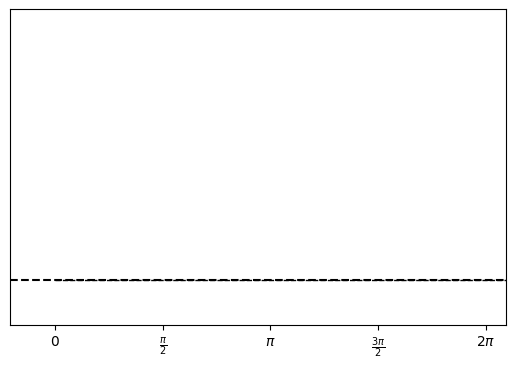

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 1) Ellipse definition (semi-axes a, b).
a, b = 1, 2.0  # longer axis is initially horizontal

# 2) Parameter for ellipse boundary
def ellipse_xy(t):
    return a*np.cos(t), b*np.sin(t)

def ellipse_xy_prime(t):
    return -a*np.sin(t), b*np.cos(t)

# 3) Arc length S(t)
t_fine = np.linspace(0, 2*np.pi-1e-4, 2001)
x_fine, y_fine = ellipse_xy(t_fine)
dx_fine, dy_fine = ellipse_xy_prime(t_fine)
ds = np.sqrt(dx_fine**2 + dy_fine**2)*(t_fine[1] - t_fine[0])
S_fine = np.cumsum(ds)
S_fine -= S_fine[0]  # Ensure S(0) = 0
perimeter = S_fine[-1]

def S_of_t(t):
    t_mod = np.mod(t, 2*np.pi-1e-4)
    frac = t_mod / (2*np.pi-1e-4)
    idx = frac * (len(t_fine) - 1)
    i0 = int(idx)
    i1 = min(i0+1, len(t_fine)-1)
    w = idx - i0
    return (1-w)*S_fine[i0] + w*S_fine[i1]

def tangent_angle(t):
    dx, dy = ellipse_xy_prime(t)
    return np.arctan2(dy, dx)

# 4) Precompute center trajectory
N_FRAMES = 200
t_vals = np.linspace(0, 2*np.pi, N_FRAMES)
center_x = np.zeros_like(t_vals)
center_y = np.zeros_like(t_vals)

for i, t_c in enumerate(t_vals):
    contact_x = S_of_t(t_c)
    contact_y = 0
    alpha = -tangent_angle(t_c)
    cosA, sinA = np.cos(alpha), np.sin(alpha)
    xc_loc, yc_loc = ellipse_xy(t_c)
    cx_local_rot = cosA*xc_loc - sinA*yc_loc
    cy_local_rot = sinA*xc_loc + cosA*yc_loc
    center_x[i] = contact_x - cx_local_rot
    center_y[i] = contact_y - cy_local_rot

# 5) Animation setup
fig, ax = plt.subplots()
tick_positions = np.linspace(0, 9.55, 5)
tick_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 3*b)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.get_yaxis().set_visible(False)

ax.hlines(0, xmin=-2, xmax=12, linestyle='--', color='black')

ax.plot([0, perimeter+5], [0, 0], 'k--', lw=1)
ellipse_line, = ax.plot([], [], lw=2)
center_trace, = ax.plot([], [], color='red', ms=3)

theta_draw = np.linspace(0, 2*np.pi, 300)

def init():
    ellipse_line.set_data([], [])
    center_trace.set_data([], [])
    return ellipse_line, center_trace

def update(frame):
    t_c = t_vals[frame]
    cx, cy = center_x[frame], center_y[frame]
    alpha = -tangent_angle(t_c)
    cosA, sinA = np.cos(alpha), np.sin(alpha)

    x_loc = a*np.cos(theta_draw)
    y_loc = b*np.sin(theta_draw)
    x_rot = cosA*x_loc - sinA*y_loc
    y_rot = sinA*x_loc + cosA*y_loc
    x_glob = x_rot + cx
    y_glob = y_rot + cy
    
    ellipse_line.set_data(x_glob, y_glob)
    center_trace.set_data(center_x[:frame+1], center_y[:frame+1])
    return ellipse_line, center_trace

ani = FuncAnimation(
    fig, update, frames=N_FRAMES, 
    init_func=init, blit=False, interval=50
)

# Save the animation as a GIF
gif_writer = PillowWriter(fps=20)
ani.save("rolling_oval.gif", writer=gif_writer)
HTML(ani.to_jshtml())



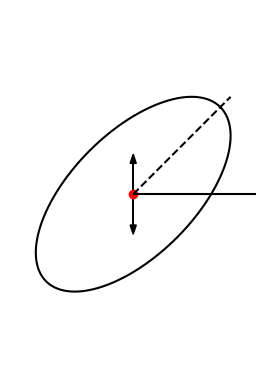

In [39]:
## Making plot of oval to show angle


def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

a, b, theta = 2, 1, np.pi/4
x, y = build_oval(a, b, theta=theta)
plt.plot(x, y, color='black')
plt.plot([0, np.sqrt(a**2+b**2)*np.cos(theta)], [0, np.sqrt(a**2+b**2)*np.sin(theta)], linestyle='--', color='black')
plt.hlines(y=0, xmin=0, xmax=2, color='black')
plt.arrow(x=0, y=0, dy=0.5, dx=0, head_width=0.1, color='black')
plt.arrow(x=0, y=0, dy=-0.5, dx=0, head_width=0.1, color='black')
plt.scatter(0, 0, color='red')
plt.ylim(-3, 3)
plt.xlim(-2, 2)
plt.axis('off')
plt
plt.gca().set_aspect('equal')
plt.show()

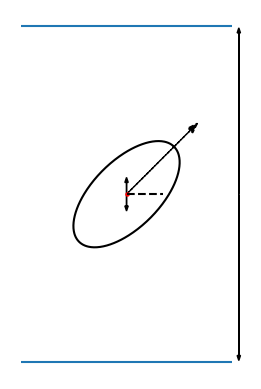

In [86]:
### Making plot of oval in a channel
plt.hlines([0, 10], xmin=-np.pi, xmax=np.pi)
a, b, theta = 2, 1, np.pi/4
x, y = build_oval(a, b, theta=theta, y=5)
plt.plot(x, y, color='black')
# plt.plot([0, 1.2*np.sqrt(a**2+b**2)*np.cos(theta)], [5, 1.2*np.sqrt(a**2+b**2)*np.sin(theta)+5], linestyle='--', color='black')
plt.arrow(x=0, dx=1.2*np.sqrt(a**2+b**2)*np.cos(theta), y=5, dy=1.2*np.sqrt(a**2+b**2)*np.sin(theta), 
          linestyle='--', color='black', head_width=0.2)
plt.hlines(5, 0, 1.1, color='black', linestyle='--')
plt.arrow(x=0, y=5, dy=0.35, dx=0, head_width=0.1, color='black') # oval arrows
plt.arrow(x=0, y=5, dy=-0.35, dx=0, head_width=0.1, color='black')
plt.arrow(x=+np.pi+0.2, y=5, dy=4.8, dx=0, head_width=0.1, color='black') # Height arrows
plt.arrow(x=+np.pi+0.2, y=5, dy=-4.8, dx=0, head_width=0.1, color='black')

plt.scatter(0, 5, color='red', s=5)
plt.axis('off')

plt.gca().set_aspect('equal')


In [ ]:
trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import time

# Function to generate an oval at a given theta and y
def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

# Function to animate and save as GIF
def animate_trajectory_and_oval_gif(trajectory, a=1, b=0.5, lower_bounds=None, upper_bounds=None, xlim=None, ylim=None, dt=0.05, save_path="oval_trajectory.gif"):

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.gca().set_aspect('equal')
    # Set axis limits
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)

    ax.set_xlim(-2*a, 2*a)  # Adjust horizontal limits based on oval size
    ax.set_ylim(*ylim)

    ax.hlines([ylim[0], ylim[1]], xmin=-2, xmax=2, color='black', linestyle='-')
    ax.axis('off')

    # Initialize plot elements
    oval_patch, = ax.plot([], [], 'b-', lw=2, label="Oval")
    center_dot, = ax.plot([], [], 'ro', markersize=5, label="Center")
    # trajectory_path, = ax.plot([], [], 'r-', lw=2, alpha=0.6, label="Path")

    # Store the center trace
    center_x_path, center_y_path = [], []

    # Update function for animation
    def update(step_i):
        theta, y = trajectory[step_i]

        # Compute oval shape
        oval_x, oval_y = build_oval(a, b, theta, y)

        # Update oval plot
        oval_patch.set_data(oval_x, oval_y)
        center_dot.set_data([0], [y])  # The center of the oval at x=0

        # Store center path
        center_x_path.append(0)
        center_y_path.append(y)
        # trajectory_path.set_data(center_x_path, center_y_path)

        # Update title
        # ax.set_title(f"Oval Moving in Channel - Step {step_i+1}/{len(trajectory)}")

        return oval_patch, center_dot

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=dt * 1000, blit=True)

    # Save animation as GIF
    ani.save(save_path, writer="pillow", fps=int(1/dt))

    print(f"Animation saved as {save_path}")
    plt.close(fig)  # Close the figure after saving

# Generate trajectory (example)
trajectory = trajectories.loc[trajectories['simulation']==2][['theta', 'y']].to_numpy()
trajectory_plot = trajectory[::10]
# Run animation and save as GIF
animate_trajectory_and_oval_gif(trajectory_plot, a=1, b=0.5, ylim=[0.5, 9.5], dt=0.01, save_path="oval_moving_1st.gif")


Animation saved as oval_moving_1st.gif


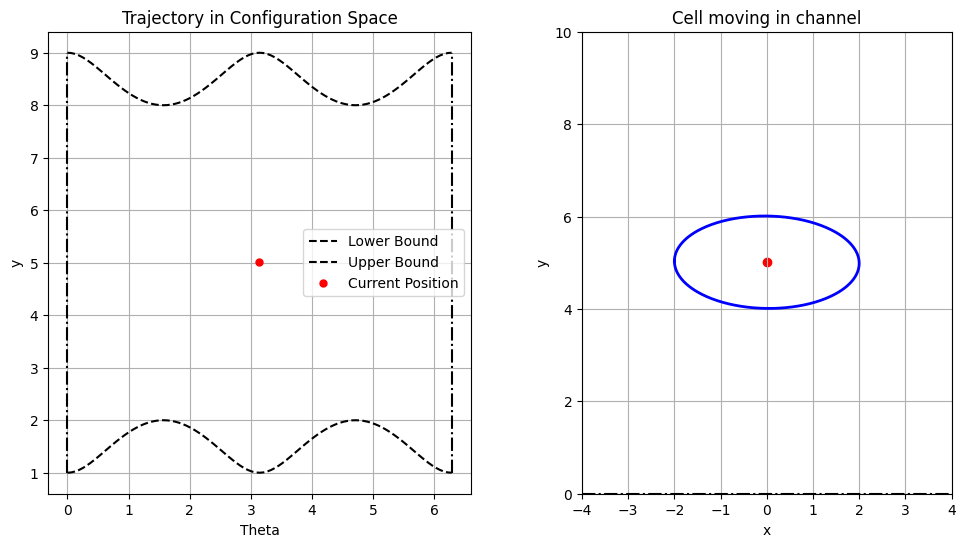

In [8]:
## Obtain example cell dynamics
# For plotting a single trajectory to see how it's working out
from IPython.display import display, clear_output
import time



def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

def animate_trajectory_and_oval(trajectory, a=1, b=0.5, lower_bounds=None, upper_bounds=None, xlim=None, ylim=None, dt=0.05):

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)
    
    ax1.set_xlim(*xlim)
    ax1.set_ylim(*ylim)
    ax2.set_xlim(-2*a, 2*a)  # Adjust horizontal limits based on oval size
    ax2.set_ylim(*ylim)

    for step_i in range(len(trajectory)):
        # Clear previous frame
        clear_output(wait=True)
        ax1.clear()
        ax2.clear()

        # Update oval plot bounds because it clears them every time
        ax2.set_xlim(-2*a, 2*a)
        ax2.set_ylim(*ylim)

        # Extract current values
        theta, y = trajectory[step_i]

        # Extract trajectory so far
        x_vals = trajectory[:step_i+1, 0]
        y_vals = trajectory[:step_i+1, 1]

        # Plot bounds on trajectory space
        if lower_bounds is not None:
            ax1.plot(lower_bounds[0], lower_bounds[1], 'k--', label="Lower Bound")
        
        if upper_bounds is not None:
            ax1.plot(upper_bounds[0], upper_bounds[1], 'k--', label="Upper Bound")

        # Plot the trajectory in (theta, y) space
        # ax1.plot(x_vals, y_vals, 'g-', lw=1.5, alpha=0.7, label="Trajectory")  # Past trajectory
        ax1.plot(theta, y, 'ro', ms=5, label="Current Position")  # Moving point
        ax1.vlines([0, np.pi*2], ymin=1, ymax=9, linestyle='-.', color='black')

        # Generate and plot the oval in real space
        oval_x, oval_y = build_oval(a, b, theta, y)
        ax2.plot(oval_x, oval_y, 'b-', lw=2, label="Oval")
        ax2.scatter(0, y, color='red')
        ax2.axhline(0, color='black', linestyle='-.')  # Reference line


        # Set titles and labels
        ax1.set_title("Trajectory in Configuration Space")
        ax1.set_xlabel("Theta")
        ax1.set_ylabel("y")
        ax1.legend()
        ax1.grid(True)

        ax2.set_title("Cell moving in channel")
        ax2.set_xlabel("x")
        ax2.set_ylabel("y")
        ax2.set_aspect('equal', 'box')
        # ax2.legend()
        ax2.grid(True)

        # title
        # fig.suptitle(f"Step {step_i+1}/{len(trajectory)}", fontsize=14, fontweight='bold')

        # Display updated figure
        display(fig)
        time.sleep(dt)  # Control animation speed

    plt.close(fig)  # Close figure after animation completes

W = 2*np.pi
H = 10
a, b = 2, 1
oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)

trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
trajectory = trajectories.loc[trajectories['simulation']==0][['theta', 'y']].to_numpy()
trajectory = trajectory[::10]
x_grid = np.linspace(0, W, 101)
animate_trajectory_and_oval(trajectory[0:2,:], a=a, b=b, lower_bounds=[x_grid, lower_bound(a, b, x_grid)],
                            upper_bounds=[x_grid, upper_bound(a, b, x_grid)], xlim=[-5, 5], ylim=[0,H],
                            dt=0.01)
# Choose 700 steps from onwards
# 3300 steps later too
#


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# -------------------------
# 1) Oval builder function (same as before)
def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)
    y_coords = b * np.sin(t)
    
    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords
    
    # Translate vertically to match y-position
    y_coords_rot += y  
    return x_coords_rot, y_coords_rot

# -------------------------
# 2) Animation function that saves the output as a GIF
def animate_trajectory_and_oval_gif(trajectory, a=1, b=0.5, 
                                      lower_bounds=None, upper_bounds=None, 
                                      xlim=None, ylim=None, dt=0.05, 
                                      save_path="example_trajectory.gif"):
    """
    Creates an animation of the trajectory and the rolling oval,
    and saves the result as a GIF.
    """
    # Create figure with two subplots: left (configuration space) and right (real space)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Set axis limits for configuration space (ax1)
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)
    # ax1.set_xlim(0, 2*np.pi)
    ax1.set_ylim(*ylim)
    
    # For real space (ax2), set horizontal limits based on oval size
    ax2.set_xlim(-2*a, 2*a)
    ax2.set_ylim(*ylim)
    
    # Plot static elements in configuration space (ax1)
    if lower_bounds is not None:
        ax1.plot(lower_bounds[0], lower_bounds[1], 'k--', label="Lower Bound")
    if upper_bounds is not None:
        ax1.plot(upper_bounds[0], upper_bounds[1], 'k--', label="Upper Bound")
    ax1.set_title("Trajectory in Configuration Space")
    ax1.set_xlabel("Theta")
    ax1.set_ylabel("y")
    ax1.vlines([0, np.pi*2], ymin=1, ymax=9, linestyle='-.', color='black')
    
    ax1.grid(True)
    
    # Plot static elements in real space (ax2)
    ax2.axhline(0, color='black', linestyle='--')
    ax2.set_title("Cell Moving in Channel")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_aspect('equal', 'box')
    ax2.grid(True)
    
    # Create dynamic artists:
    # In configuration space: the past trajectory (green line) and the current position (red dot)
    traj_line, = ax1.plot([], [], 'g-', lw=1.5, alpha=0.7)
    current_pos, = ax1.plot([], [], 'ro', ms=5, label="Current Position")
    center_dot, = ax2.plot([], [], 'ro', ms=5, label="Oval Center")
    ax1.legend()
    # In real space: the oval (blue line)
    oval_line, = ax2.plot([], [], 'b-', lw=2, label="Oval")
    
    # A suptitle to display the current frame number
    suptitle = fig.suptitle("", fontsize=14, fontweight='bold')
    
    # Initialization function: clear the dynamic artists.
    def init():
        traj_line.set_data([], [])
        current_pos.set_data([], [])
        center_dot.set_data([], [])
        oval_line.set_data([], [])
        suptitle.set_text("")
        return traj_line, current_pos, oval_line, suptitle
    
    # Update function: called for each frame
    def update(frame):
        # In configuration space, update the trajectory and current position.
        x_vals = trajectory[:frame+1, 0]
        y_vals = trajectory[:frame+1, 1]
        traj_line.set_data(x_vals, y_vals)
        current_theta = trajectory[frame, 0]
        current_y = trajectory[frame, 1]
        current_pos.set_data([current_theta], [current_y])
        
        # In real space, compute and update the oval based on current theta and y.
        oval_x, oval_y = build_oval(a, b, current_theta, current_y)
        oval_line.set_data(oval_x, oval_y)
        center_dot.set_data([0], [current_y])
        
        # Update the suptitle with the frame information.
        suptitle.set_text(f"Step {frame+1}/{len(trajectory)}")
        return traj_line, current_pos, oval_line, suptitle
    
    # Create the animation using FuncAnimation.
    ani = FuncAnimation(fig, update, frames=len(trajectory), init_func=init, 
                        interval=dt*1000, blit=True)
    
    # Save the animation as a GIF using PillowWriter.
    writer = PillowWriter(fps=int(1/dt))
    ani.save(save_path, writer=writer)
    print("Animation saved as", save_path)
    
    plt.close(fig)  # Close the figure once saved

# -------------------------
# 3) Example usage
# Load trajectory data (adjust path as needed)
# trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
# For this example, we assume 'trajectories' is already loaded.
trajectory = trajectories.loc[trajectories['simulation'] == 0][['theta', 'y']].to_numpy()
trajectory = trajectory[::10]  # take every 10th point

W = 2 * np.pi
H = 10
a, b = 2, 1
oval_vert_dist = lambda a, b, theta: np.abs(np.sqrt(a**2 * np.sin(theta)**2 + b**2 * np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)
x_grid = np.linspace(0, W, 101)

animate_trajectory_and_oval_gif(
    trajectory, a=a, b=b, 
    lower_bounds=[x_grid, lower_bound(a, b, x_grid)],
    upper_bounds=[x_grid, upper_bound(a, b, x_grid)],
    xlim=[-5, 5], ylim=[0, H],
    dt=0.01, save_path="example_trajectory.gif"
)


Animation saved as example_trajectory.gif


(np.float64(-0.3141592653589793),
 np.float64(6.5973445725385655),
 np.float64(0.6),
 np.float64(9.4))

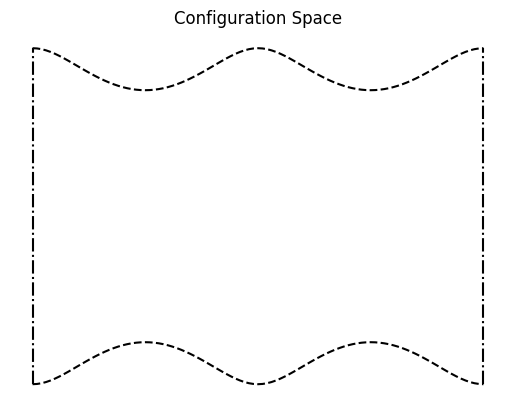

In [22]:
## Making pdf boundary and conditions for it

H = 10 # height/distance of upper bound from lower bound
a = a
b = b

oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)

y = np.linspace(0, 10, 101)
theta = np.linspace(0, 2*np.pi, 101)
upper_bound_points = np.array([H  - abs(oval_vert_dist(a, b, th)) for th in theta])
lower_bound_points = np.array([0 + abs(oval_vert_dist(a, b, th)) for th in theta]) # 0 because I implicitly assume that the lower bound is 0

# normal_angle = lambda a, b, theta: (np.cos(theta)*np.sin(theta)*(b**2 - a**2))/ \
#     (np.sqrt(a**2*np.cos(theta)**2 + b**2*np.sin(theta)**2))
# theta_norm = np.linspace(0, 2*np.pi, 21)
# y_norm = np.array([abs(y_topmost(a, b, th)) for th in theta_norm])
# normal_vectors = np.array([[normal_angle(a, b, th), 1] for th in theta_norm])
# tangent_vectors = np.array([[1, -normal_angle(a, b, th)] for th in theta_norm])

fig, ax = plt.subplots()
ax.plot(theta, upper_bound_points, linestyle='--', color='black')
ax.plot(theta, lower_bound_points, linestyle='--', color='black')
ax.vlines([0, np.pi*2], ymin=b, ymax=H - b, linestyles='-.', color='black')
# ax.quiver(theta_norm, y_norm, normal_vectors[:, 0], normal_vectors[:, 1])
# ax.quiver(theta_norm, y_norm, tangent_vectors[:, 0], tangent_vectors[:, 1], color='red')
# ax.xlabel("theta")
# ax.ylabel("y")
# ax.set_aspect('equal')
plt.title("Configuration Space")
plt.axis('off')



In [ ]:
# Consolidating the fokker-planck and monte carlo results
df1 = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
df2 = pd.read_csv("data/simulations_baseline_ii_-04-03-2025.csv")
df3 = pd.read_csv("data/simulations_baseline_iii_-04-03-2025.csv")
df_fk = pd.read_csv("data/baseline_extremely_fine.csv")

dataframes = [df1, df2, df3]

# Extract final (theta, y) values for each simulation
final_positions = []

for df in dataframes:
    final_pos = df.groupby("simulation").agg({"theta": "last", "y": "last"})
    final_positions.append(final_pos)

# Combine all final positions into one DataFrame
final_positions = pd.concat(final_positions)

# Extract theta and y values
theta_final = final_positions["theta"].values
y_final = final_positions["y"].values


# Using Fk plots
import seaborn as sns
from scipy.interpolate import griddata
from scipy.integrate import simpson
df_fk["x"] = df_fk["x"] + np.pi
# df_fk['y'] = df_fk['y'] * 2
# df_fk['u'] = df_fk['u'] / 2
x_unique = np.linspace(df_fk['x'].min(), df_fk['x'].max(), 1000)
y_unique = np.linspace(df_fk['y'].min(), df_fk['y'].max(), 1000)
X, Y = np.meshgrid(x_unique, y_unique)
U = griddata((df_fk['x'], df_fk['y']), df_fk['u'], (X, Y), method='cubic')
U = np.nan_to_num(U, nan=0)
# Compute marginals
P_theta = simpson(U, x=y_unique, axis=0)
P_y = simpson(U, x=x_unique, axis=1)


In [53]:
h = x_unique[1] - x_unique[0]
[i*h for i in p_y]

NameError: name 'p_y' is not defined

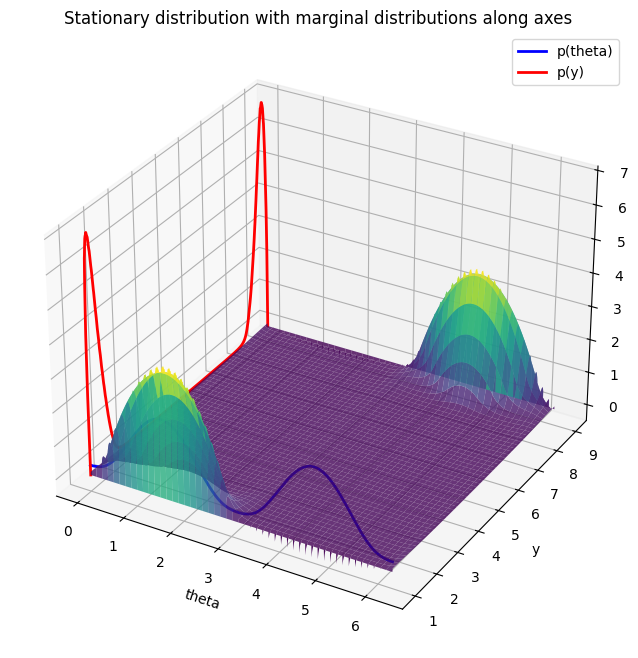

In [47]:
# Set up figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of u(x, y)
ax.plot_surface(X, Y, U, cmap='viridis', edgecolor='none', alpha=0.8)

# Marginal P(x) - Add as a line plot on X-axis
ax.plot(x_unique, np.full_like(x_unique, y_unique.min()), P_x, color='blue', lw=2, label='p(theta)')

# Marginal P(y) - Add as a line plot on Y-axis
ax.plot(np.full_like(y_unique, x_unique.min()), y_unique, P_y, color='red', lw=2, label='p(y)')

# Labels
ax.set_xlabel("theta")
ax.set_ylabel("y")
ax.set_zlabel("p(x, y)")
ax.set_title("Stationary distribution with marginal distributions along axes")
ax.legend()

plt.show()


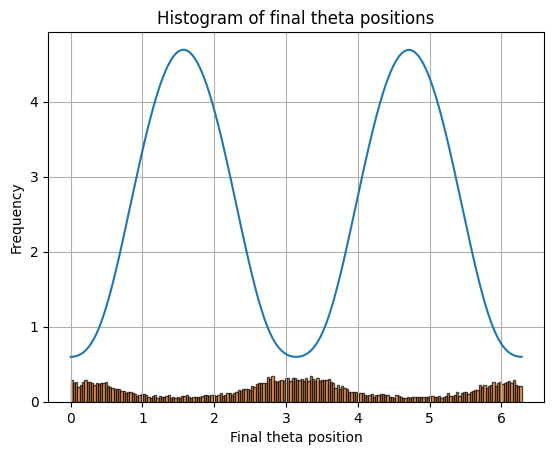

In [41]:
plt.plot(x_unique, P_x)
plt.hist(theta_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Final theta position")
plt.ylabel("Frequency")
plt.title("Histogram of final theta positions")
plt.grid(True)
plt.show()

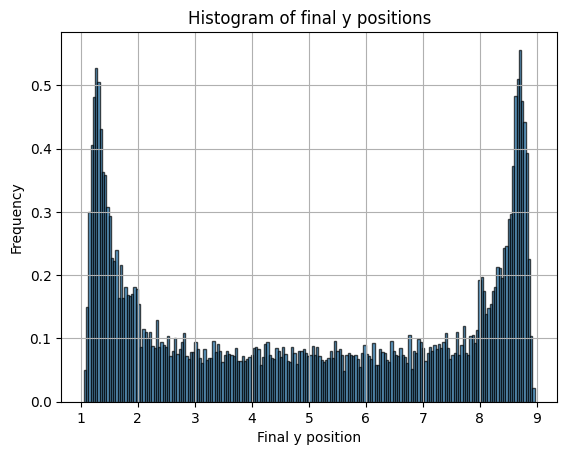

In [39]:
plt.hist(y_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Final y position")
plt.ylabel("Frequency")
plt.title("Histogram of final y positions")
plt.grid(True)
plt.show()